**Перекрестная проверка моделей**

Создать конвейер, который предварительно обрабатывает данные, тренирует
модель, а затем оценивает ее с помощью перекрестной проверки:

In [4]:
# Загрузить библиотеки
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Загрузить набор данных рукописных цифр
digits = datasets.load_digits()
# Создать матрицу признаков
features = digits.data
# Создать вектор целей
target = digits.target
# Создать стандартизатор
standardizer = StandardScaler()
# Создать объект логистической регрессии
logit = LogisticRegression()
# Создать конвейер, который стандартизирует,
# затем выполняет логистическую регрессию
pipeline = make_pipeline(standardizer, logit)
# Создать k-блочную перекрестную проверку
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Выполнить k-блочную перекрестную проверку
cv_results = cross_val_score(pipeline, # Конвейер
features, # Матрица признаков
target, # Вектор целей
cv=kf, # Метод перекрестной проверки
scoring="accuracy", # Функция потери
n_jobs=-1) # Использовать все ядра CPU
# Вычислить среднее значение
cv_results.mean()

/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.9693916821849783

Одной из стратегий может быть откладывание среза данных для тестирования. Он
называется контрольным (или отложенным) набором. В обычной проверке наши
наблюдения (признаки и цели) разбиваются на два набора, традиционно называемые тренировочным набором и тестовым набором. Мы берем тестовый набор и
откладываем его в сторону, делая вид, что никогда его раньше не видели. Затем мы
тренируем нашу модель, применяя наш тренировочный набор с использованием
признаков и вектора целей, чтобы научить модель тому, как делать наилучшее
предсказание. Наконец, мы симулируем, что никогда раньше не видели внешних
данных, и оцениваем то, как наша модель, натренированная на нашем тренировочном наборе, работает на нашем тестовом наборе. Однако этот проверочный подход
имеет два основных недостатка. Во-первых, результативность модели может сильно зависеть от того, какое количество наблюдений было выбрано для тестового набора. Во-вторых, модель не тренируется с использованием всех имеющихся данных
и не оценивается по всем имеющимся данным.

Более оптимальная стратегия, которая преодолевает эти недостатки, называется
к-блочной перекрестной проверкой (k-fold cross-validation, KFCV). В ^-блочной перекрестной проверке мы разделяем данные на к частей, называемых "блоками".
Модель обучается с помощью к - 1 блоков, объединенных в один тренировочный
набор, и затем последний блок используется в качестве тестового набора. Мы повторяем это к раз, на очередном шаге в качестве тестового набора используя другой
блок. Затем результативность модели для каждой из к итераций усредняется для
получения общей меры.

В нашем решении мы провели ^-блочную перекрестную проверку с использованием 10 блоков и вывели оценки в cv resuits:

In [5]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

Когда мы используем ^-блочную перекрестную проверку, следует учесть несколько
важных моментов. Во-первых, А:-блочная перекрестная проверка исходит из того,
что каждое наблюдение было создано независимо от другого (т. е. данные являются
независимыми одинаково распределенными [IID]). Если данные являются независимыми одинаково распределенными, то при назначении блоков рекомендуется
наблюдения перетасовывать. В библиотеке scikit-leam можно установить
shuffie=True для выполнения перетасовки.

Во-вторых, когда мы используем ^-блочную перекрестную проверку для оценивания классификатора, часто полезно иметь блоки, содержащие примерно одинаковый процент наблюдений из каждого отдельного целевого класса. Такая проверка
называется стратифицированной к-блочной. Например, если бы наш вектор целей
содержал пол, и 80% наблюдений были бы мужского пола, то каждый блок содержал бы 80% наблюдений с мужским полом и 20% наблюдений с женским полом.
В библиотеке scikit-leam можно проводить стратифицированную ^-блочную перекрестную Проверку, ПОМеНЯВ КЛаСС KFold На КЛаСС StratifiedKFold.

Наконец, при использовании перекрестно-проверочных наборов или перекрестной
проверки важно предварительно обработать данные на основе тренировочного набора, а затем применить эти преобразования к обоим наборам: тренировочному и
тестовому. Например, когда мы выполняем подгонку (с помощью метода fit) нашего объекта стандартизации, standardize^ мы вычисляем среднее и дисперсию
только тренировочного набора. Затем мы применяем это преобразование (с помощью метода transform) и к тренировочному, и к тестовому наборам:

In [8]:
# Импортировать библиотеку
from sklearn.model_selection import train_test_split
# Создать тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)
# Выполнить подгонку стандартизатора к тренировочному набору
standardizer.fit(features_train)
# Применить к обоим наборам: тренировочному и тестовому
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

Здесь мы делаем вид, будто тестовый набор содержит неизвестные данные. Если
мы выполним подгонку обоих наших препроцессоров, используя наблюдения из
тренировочного и тестового наборов, то часть информации из тестового набора
просочится в наш тренировочный набор. Это правило применимо для любого шага
предобработки, например для отбора признаков.
Пакет pipeline библиотеки scikit-leam упрощает задачу при использовании методов
перекрестной проверки. Сначала мы создаем конвейер, который предварительно
обрабатывает данные (например, standardizer), а затем тренирует модель (логистическая регрессия, logit):

In [9]:
# Создать конвейер
pipeline = make_pipeline(standardizer, logit)

Затем мы запускаем ^-блочную перекрестную проверку, используя этот конвейер,
и библиотека scikit-leam делает всю работу за нас:

In [11]:
# Выполнить k-блочную перекрестную проверку
cv_results = cross_val_score(pipeline, # Конвейер
features, # Матрица признаков
target, # Вектор целей
cv=kf, # Метод перекрестной проверки
scoring="accuracy", # Функция потери
n_jobs=-1) # Использовать все ядра CPU

/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Метод cross vai score сопровождается тремя параметрами, которые мы не обсуждали, и их стоит отметить. Параметр cv определяет нашу методику перекрестной
проверки, .^-блочный метод является наиболее распространенным на сегодняшний
день, но есть и другие, такие как перекрестная проверка с исключением по одному
(leave-one-out), где количество блоков к равно количеству наблюдений. Параметр scoring определяет наш метрический показатель успеха, некоторые из метрических
показателей успеха обсуждаются в других рецептах в этой главе. Наконец, n_jobs=-i
предписывает библиотеке scikit-leam использовать все доступные ядра CPU. Например, если ваш компьютер имеет четыре ядра (распространенное количество для
ноутбуков), то для ускорения работы библиотека scikit-leam будет использовать все
четыре ядра сразу.

Однако часто данных недостаточно, чтобы часть из них можно было сохранить для тестирования. Более сложной версией обучающих / тестовых наборов является перекрестная проверка без исключения (LOOCV), при которой показатели точности получаются следующим образом. Предположим, что имеется nn независимых наблюдений, y1,...,yn

1. Пусть наблюдение i сформирует набор тестов и подгонит модель, используя оставшиеся данные. Затем вычислите ошибку (ei*=yi-<u>yi</u>)
 для пропущенного наблюдения. Это иногда называют “прогнозируемым остатком”, чтобы отличать его от обычного остатка.
2. Повторите шаг 1 для i=1,...,n.
3. Вычислите MSE из e1*,...,en*. Мы будем называть это резюме.

Это гораздо более эффективное использование доступных данных, поскольку вы пропускаете только одно наблюдение на каждом шаге. Однако его реализация может занять очень много времени (за исключением линейных моделей — см. Ниже).

https://betatim.github.io/posts/cross-validation-gone-wrong/

 **Создание
базовой регрессионной модели**

В качестве ориентира требуется простая базовая регрессионная модель для сравнения с вашей моделью.

 Фиктивная модель - это модель, которая предсказывает, просто угадывая или используя простое правило. Например, для классификации случайным образом присваивается класс или просто используется класс большинства; для регрессии используется только среднее значение. Она служит базовым эталоном и проверкой работоспособности.
 
 Регрессор, который делает прогнозы, используя простые правила.

Этот регрессор полезен в качестве простой базовой линии для сравнения с другими (реальными) регрессорами. Не используйте его для решения реальных проблем.

In [16]:
# Загрузить библиотеки
from sklearn.datasets import load_iris
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
# Загрузить данные
boston = load_iris()
# Создать матрицу признаков и вектор целей
features, target = boston.data, boston.target
# Разбить на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
# Создать фиктивный регрессор
dummy = DummyRegressor(strategy='mean')
# "Натренировать" фиктивный регрессор
dummy.fit(features_train, target_train)
# Получить оценку коэффициента детерминации (R-squared)
dummy.score(features_test, target_test)

-0.03499875559980081

Для сравнения, мы тренируем нашу модель и вычисляем оценку результативности:

In [18]:
# Загрузить библиотеку
from sklearn.linear_model import LinearRegression
# Натренировать простую линейно-регрессионную модель
ols = LinearRegression()
ols.fit(features_train, target_train)
# Получить оценку коэффициента детерминации (R-squared)
ols.score(features_test, target_test)

0.8886123598795971

Фиктивный регрессор DummyRegressor позволяет нам создавать очень простую модель, которую можно использовать в качестве ориентира для сравнения с нашей
реальной моделью. Это часто может быть полезно с целью симулировать "наивный" существующий предсказательный процесс в программном продукте или системе. Например, программный продукт может быть изначально жестко запрограммирован допускать, что все новые пользователи будут тратить $100 в первый
месяц, независимо от их признаков. Если мы закодируем это допущение в базовую
модель, то сможем вещественно заявить о преимуществах применения подхода на
основе машинного самообучения.

В классе DummyRegressor используется параметр strategy для задания метода предсказания, включая среднее или медианное значение в тренировочном наборе. Более
того, если присвоить параметру strategy значение constant и учесть параметр
constant, мы сможем заставить фиктивный регрессор предсказывать некоторое постоянное значение для каждого наблюдения:

In [ ]:
# Создать фиктивный регрессор, который
# предсказывает 20 для всех наблюдений
elf = DummyRegressor(strategy='constant', constant=20)
elf.fit(features_train, target_train)
# Вычислить оценку
elf.score(features_test, target_test)

Одно небольшое замечание о методе score. По умолчанию данный метод возвращает оценку коэффициента детерминации (R-squared, R2)‘:

**Создание
базовой классификационной модели**

In [4]:
# Загрузить библиотеки
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
# Загрузить данные
iris = load_iris()

# Создать матрицу признаков и вектор целей
features, target = iris.data, iris.target
# Разбить на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
# Создать фиктивный классификатор
dummy = DummyClassifier(strategy='uniform', random_state=1)
# "Натренировать" модель
dummy.fit(features_train, target_train)
# Получить оценку точности
dummy.score(features_test, target_test)

0.42105263157894735

Путем сопоставления базового классификатора с нашим натренированным классификатором можно увидеть улучшение:

In [5]:
# Загрузить библиотеку
from sklearn.ensemble import RandomForestClassifier
# Создать классификатор случайного леса
classifier = RandomForestClassifier()
# Натренировать модель
classifier.fit(features_train, target_train)
# Получить оценку точности
classifier.score(features_test, target_test)

0.9736842105263158

Общепринятая мера результативности классификатора — показатель, насколько он
лучше, чем случайное угадывание. Фиктивный классификатор DummyClassifier библиотеки scikit-leam облегчает выполнение такого сравнения. Параметр strategy
предоставляет ряд вариантов для генерации значений. Есть две особенно полезных
стратегии. Во-первых, стратегия stratified делает предсказания, которые пропорциональны долям классов вектора целей в тренировочном наборе (т. е. если 20%
наблюдений в тренировочных данных составляют женщины, то фиктивный классификатор DummyClassifier будет предсказывать женщин в 20% случаях). Во-вторых, стратегия uniform будет генерировать предсказания случайным образом между
разными классами. Например, если 20% наблюдений — женщины и 80% — мужчины, то стратегия uniform будет давать предсказания, которые составят 50% женщин и 50% мужчин.

**Оценивание предсказаний
бинарного классификатора**

Применить метод cross_val_score библиотеки scikit-leam для проведения перекрестной проверки, используя при этом параметр scoring для определения одного из
нескольких метрических показателей результативности, включая точность, прецизионность, полноту и оценку Fx.

Точность является общепринятым метрическим показателем результативности.
Это просто доля правильно предсказанных наблюдений:

accuracy = (TP+TN)/(TP+TN+FP+FN)

где:
- ТР — количество истинноположительных исходов; наблюдения, которые являются частью положительного класса (имеет заболевание, приобретен товар и т. д.) и которые мы предсказали правильно;
- TN— количество истинноотрицательных исходов; наблюдения, которые являются частью отрицательного класса (не имеет этого заболевания, не преобретен товар и т. д.) и которые мы предсказали правильно;
- FP— количество ложноположительных исходов, также называется ошибкой 1- го рода; наблюдения, предсказанные как часть положительного класса, которые на самом деле являются частью отрицательного класса;
- FN — количество ложноотрицательных исходов, также называется ошибкой 2- го рода; наблюдения, предсказанные как часть отрицательного класса, которые на самом деле являются частью положительного класса.

Мы можем измерить точность в трехблочной (количество блоков, принятое по
умолчанию) перекрестной проверке, установив параметр scoring="accuracy":

In [7]:
# Загрузить библиотеки
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# Сгенерировать матрицу признаков и вектор целей
X, у = make_classification(n_samples = 10000,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 2,
random_state = 1)
# Создать объект логистической регрессии
logit = LogisticRegression()
# Перекрестно проверить модель, используя показатель точности
cross_val_score(logit, X, у, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

Привлекательность точности (*accuracy*) заключается в том, что она имеет интуитивное и простое объяснение на русском языке: доля наблюдений, предсказанных правильно.
Однако в реальном мире часто наши данные имеют несбалансированные классы
(например, 99.9% наблюдений относятся к классу 1 и только 0.1%— к классу 2).
При наличии несбалансированных классов точность страдает от парадокса, когда
модель высокоточна, но не обладает предсказательной силой. Например, представьте, что мы пытаемся предсказать наличие очень редкого рака, который встречается у 0.1% населения. После тренировки нашей модели мы обнаруживаем, что
точность находится на уровне 95%. Вместе с тем 99.9% людей не болеют раком:
если мы просто создадим модель, которая "предсказывает", что никто не имеет такой формы рака, то наша наивная модель будет на 4.9% точнее, но совершенно
очевидно, не будет способна ничего предсказывать. По этой причине мы часто мотивированы использовать другие метрические показатели, такие как прецизионность, полнота и оценка F1 .

Прецизионность (*Precision*)— это доля каждого наблюдения, предсказанного положительно,
которое на самом деле положительно. Эту меру можно представить как измерительный шум в наших предсказаниях, т. е. когда мы предсказываем что-то положительное, насколько вероятно, что мы будем правы. Модели с высокой прецизионностью пессимистичны, т. е. они предсказывают наблюдение как принадлежащее
положительному классу, только когда они очень уверены в этом. Формально прецизионность рассчитывается по формуле:

precision = TP/(TP+FP)

In [8]:
# Перекрестно проверить модель, используя показатель прецизионности
cross_val_score(logit, X, у, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

Полнота (*Recall*)— это доля каждого положительного наблюдения, которое по-настоящему положительно. Полнота измеряет способность модели идентифицировать наблюдение положительного класса. Модели с высокой полнотой оптимистичны, т. е.
они имеют низкую планку для предсказания, что наблюдение находится в положительном классе:

Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Recall = TP/(TP+FN)

In [9]:
# Перекрестно проверить модель, используя показатель полноты
cross_val_score(logit, X, у, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

*Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.*

Если вы впервые встречаете показатели прецизионности и полноты, вы должны
затратить немного времени, чтобы полностью в них разобраться. Это один из их
недостатков данных характеристик по сравнению с точностью; прецизионность и
полнота менее интуитивны. Почти всегда нужен какой-то баланс между прецизионностью и полнотой, и эта роль отводится оценке F1. Оценка F1 является средним
гармоническим (видом среднего значения, используемого для соотношений):

F1 = 2*Precision*Recall / (Precision+Recall)

Она является мерой правильности, достигаемой в положительном предсказании,
т. е. сколько наблюдений, помеченных как положительные, на самом деле положительные:

In [11]:
# Перекрестно проверить модель, используя показатель fl
cross_val_score(logit, X, у, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

**Оценивание порогов
бинарного классификатора**

Кривая рабочей характеристики приемника (receiver operating characteristic, ROCкривая) часто используется для оценки качества бинарного классификатора. Кривая
ROC сравнивает наличие истинноположительных и ложноположительных исходов
на каждом вероятностном пороге (т. е. вероятности, при которой наблюдение предсказывается как класс). Построив график кривой ROC, можно увидеть, насколько
хорошо работает модель (рис. 11.1). Классификатор, который правильно предсказывает каждое наблюдение, будет выглядеть как сплошная светло-серая кривая на
приведенном ниже графике, которая резко поднимается наверх. Классификатор,
который предсказывает наугад, имеет вид диагональной прямой. Чем лучше модель, тем ближе она к сплошной линии. В библиотеке scikit-leam для вычисления
истинно- и ложноположительных исходов на каждом пороге можно использовать
метод roc curve, а затем вывести их на график:

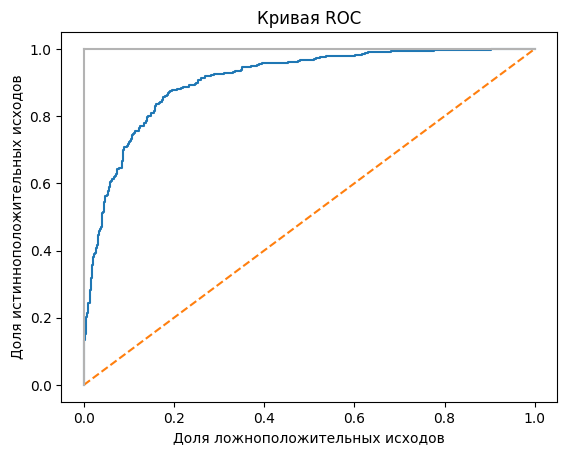

In [18]:
# Загрузить библиотеки
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Создать матрицу признаков и вектор целей
features, target = make_classification(n_samples=10000,
                                        n_features=10,
                                        n_classes=2,
                                        n_informative=3,
                                        random_state=3)
# Разбить на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Создать логистический регрессионный классификатор
logit = LogisticRegression()

# Натренировать модель
logit.fit(features_train, target_train)

# Получить предсказанные вероятности
target_probabilities = logit.predict_proba(features_test)[:,1]

# Создать доли истинно- и ложноположительных исходов
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# Построить график кривой ROC
plt.title("Кривая ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel("Доля истинноположительных исходов")
plt.xlabel("Доля ложноположительных исходов")
plt.show()

До сих пор мы рассматривали только модели, основанные на предсказываемых ими
значениях. Однако во многих обучающихся алгоритмах эти предсказанные значения основаны на вероятностных оценках, т. е. каждому наблюдению дается явная
вероятность принадлежности в каждом классе. В нашем решении, чтобы увидеть
предсказанные вероятности для первого наблюдения, мы можем применить метод
**predict_probe**:

In [19]:
# Получить предсказанные вероятности
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

В этом примере первое наблюдение имеет -87% шанс быть в отрицательном классе
(0) и 13% шанс быть в положительном классе (1). По умолчанию библиотека scikitleam предсказывает, что наблюдение является частью положительного класса, если
вероятность больше 0.5 (эта величина называется вероятностным порогом). Однако вместо принятия средней позиции нередко требуется явным образом сместить
нашу модель, чтобы использовать другой порог по неким существенным причинам.
Например, если ложноположительный исход очень дорого обходится нашей компании, мы можем предпочесть модель с высоким вероятностным порогом. Нам не
удастся предсказать некоторые положительные исходы, но когда наблюдение предсказано как положительное, мы можем быть очень уверены в том, что предсказание
является правильным. Этот компромисс представлен в доле истинноположительных (true positive rate, TPR) и доле ложноположительных исходов (false positive rate,
FPR). Доля истинноположительных исходов — это количество наблюдений, предсказанных правильно, деленное на все истинноположительные наблюдения:

TPR = Истинноположительные / Истинноположительные + Ложноотрицательные

Доля ложноположительных исходов — это количество неправильно предсказанных
положительных исходов, деленное на все истинноотрицательные исходы:
    
FPR = Ложноположительные / Ложноположительные + Истинноотрицательные

Кривая ROC представляет соответствующие доли TPR и FPR для каждого вероятностного порога. Например, в нашем решении примерный порог 0.50 имеет долю
истинноположительных (TPR) 0.81 и долю ложноположительных (FPR) 0.15:

In [21]:
print("Порог:", threshold[116])
print("Доля истинноположительных:", true_positive_rate[116])
print("Доля ложноположительных:", false_positive_rate [116])

Порог: 0.5331715230155316
Доля истинноположительных: 0.810204081632653
Доля ложноположительных: 0.14901960784313725


Однако если мы увеличим порог до ~80% (т. е. повысим уверенность модели перед
тем, как она будет предсказывать наблюдение в качестве положительного), то доля
истинноположительных (TPR) заметно упадет, и то же самое касается доли ложноположительных (FPR):

In [22]:
print("Порог:", threshold[45])
print("Доля истинноположительных: ", true_positive_rate [45])
print("Доля ложноположительных:", false_positive_rate[45])

Порог: 0.818913387665929
Доля истинноположительных:  0.5448979591836735
Доля ложноположительных: 0.047058823529411764


https://community.alteryx.com/t5/Data-Science/ROC-Curves-in-Python-and-R/ba-p/138430

**Оценивание предсказаний
мульти классового классификатора**

Дана модель, которая предсказывает три класса или более, и требуется оценить ее
результативность.
Использовать перекрестную проверку с оценочным метрическим показателем, способным справляться с более чем двумя классами:

In [2]:
# Загрузить библиотеки
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# Сгенерировать матрицу признаков и вектор целей
features, target = make_classification(n_samples = 10000,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 3,
random_state = 1)
# Создать объект логистической регрессии
logit = LogisticRegression()
# Перекрестно проверить модель, используя показатель точности
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

Процедура перекрестной проверки  (cross-validation сокращенно CV). Набор тестов по-прежнему должен храниться для окончательной оценки, но набор для проверки больше не нужен при выполнении резюме. В базовом подходе, называемом k- кратным CV, обучающая выборка разбивается на k меньших наборов (другие подходы описаны ниже, но обычно следуют тем же принципам). Для каждой из k «фолдов» выполняется следующая процедура :

Модель обучается с использованием  складок в качестве обучающих данных;
Результирующая модель проверяется на оставшейся части данных (т. е. она используется в качестве тестового набора для вычисления показателя производительности, такого как точность).
Показатель производительности, сообщаемый k- фолд перекрестной проверкой, тогда является средним из значений, вычисленных в цикле. Этот подход может быть дорогостоящим в вычислительном отношении, но не тратит слишком много данных (как в случае фиксации произвольного набора проверки), что является основным преимуществом в таких задачах, как обратный вывод, когда количество выборок очень мало.



Многие встроенные в библиотеку scikit-leam метрические показатели предназначены для оценивания бинарных классификаторов. Однако многие из этих метрических показателей могут быть расширены для использования в условиях более двух классов. Прецизионность, полнота и оценки Fx являются полезными метрическими
показателями, которые мы уже подробно рассмотрели в предыдущих рецептах.
Хотя все они изначально были разработаны для бинарных классификаторов, их
можно применить и к мультиклассовой конфигурации, рассматривая наши данные
как набор бинарных классов. Это позволяет применять метрические показатели
к каждому классу, как если бы он был единственным классом в данных, а затем
агрегировать оценочные показатели для всех классов путем их усреднения:

In [4]:
# Перекрестно проверить модель,
# используя макроусредненную оценку F1
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

В этом фрагменте кода постфикс macro относится к методу, используемому для
усреднения оценок из классов:
- macro — рассчитать среднее метрических оценок для каждого класса, взвешивая каждый класс одинаково;
- weighted — рассчитать среднее метрических оценок для каждого класса, взвешивая каждый класс пропорционально его размеру в данных;
- micro— рассчитать среднее метрических оценок для каждой комбинации "класс — наблюдение".

# Визуализация результативности классификатора

Даны предсказанные классы и истинные классы тестовых данных, и требуется
визуально сопоставить качество модели.

Решение
Использовать матрицу ошибок (несоответствий), которая сравнивает предсказанные и истинные классы (рис. 11.2):

/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


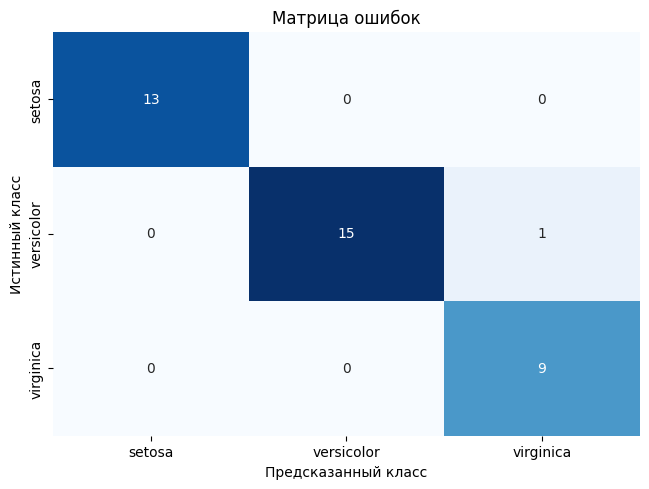

In [10]:
# Загрузить библиотеки
import matplotlib.pyplot as pit
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
# Загрузить данные
iris = datasets.load_iris()
# Создать матрицу признаков
features = iris.data
# Создать вектор целей
target = iris.target
# Создать список имен целевых классов
class_names = iris.target_names
# Создать тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)
# Создать объект логистической регрессии
classifier = LogisticRegression()
# Натренировать модель и сделать предсказания
target_predicted = classifier.fit(features_train, target_train).predict(features_test)
# Создать матрицу ошибок
matrix = confusion_matrix(target_test, target_predicted)
# Создать фрейм данных pandas
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Создать тепловую карту
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
pit.title("Матрица ошибок")
pit.tight_layout()
pit.ylabel("Истинный класс")
pit.xlabel("Предсказанный класс")
pit. show ()

Матрицы ошибок (несоответствий) — это простая и эффективная визуализация
качества работы классификатора. Одним из основных преимуществ матриц ошибок
является их интерпретируемость. Каждый столбец матрицы (часто визуализируемый как тепловая карта) представляет предсказанные классы, в то время как каждая
строка показывает истинные классы. Конечный результат заключается в том, что
каждая ячейка является одной возможной комбинацией предсказанных и истинных
классов. Это, вероятно, лучше всего объяснить на примере. В нашем решении левая
верхняя ячейка— это количество наблюдений, предсказанных как цветок ириса
щетинистого Iris setosa (обозначенные столбцом), которые действительно являются
цветками ириса щетинистого (обозначенные строкой). Это означает, что модель
точно предсказала все цветки ириса щетинистого. Однако модель не так хорошо
справилась с предсказанием цветка ириса вергинского Iris virginica. Правая нижняя
ячейка указывает на то, что модель успешно предсказала девять наблюдений цветка
ириса вергинского, но (глядя на одну ячейку вверх) при этом предсказала шесть
цветков ириса вергинского, которые в действительности были цветками ириса разноцветного Iris versicolor.

В отношении матриц ошибок стоит отметить три момента. Во-первых, идеальная
модель будет иметь значения вдоль диагонали и нули в остальных ячейках. Плохая
модель будет выглядеть так, будто количество наблюдений равномерно распределено по ячейкам. Во-вторых, матрица ошибок позволяет увидеть не только, где
модель была неправильной, но и как она была неправильной, т. е. мы можем взглянуть на шаблоны неправильной классификации. Например, наша модель легко
смогла различить Iris virginica и Iris setosa, но она гораздо хуже справилась с классификацией Iris virginica и Iris versicolor. Наконец, матрицы ошибок работают
с любым количеством классов (хотя, если бы в нашем векторе целей был миллион
классов, визуализацию матрицы ошибок было бы трудно прочитать).

https://en.wikipedia.org/wiki/Confusion_matrix

**Оценивание регрессионных моделей**

Использовать среднеквадратическую ошибку (mean squared error, MSE):

In [14]:
# Загрузить библиотеки
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Сгенерировать матрицу признаков, вектор целей
features, target = make_regression(n_samples = 100,
n_features = 3,
n_informative = 3,
n_targets = 1,
noise = 50,
coef = False,
random_state = 1)
# Создать объект линейной регрессии
ols = LinearRegression()
# Перекрестно проверить линейную регрессию,
# используя (отрицательный) показатель MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

neg_mean_squared_error - это просто -1 * mean_squared_error. Это связано с соглашением в Scikit-learn api, которому следуют все оценщики.
*Среднеквадратическая ошибка (MSE)*

Среднеквадратичная ошибка (MSE) рассчитывается как среднее значение квадратов разностей между прогнозируемыми и фактически наблюдаемыми значениями.

Еще одним распространенным метрическим показателем регрессии является коэффициент детерминации R^2:

In [15]:
# Перекрестно проверить линейную регрессию,
# используя показатель R-квадрат
cross_val_score(ols, features, target, scoring='r2') 

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

MSE является одним из наиболее распространенных оценочных показателей для
регрессионных моделей. Формально MSE имеет вид:
    
MSE = 1/n * sum( <u>yi</u> - yi)^2

где п — число наблюдений; уi — истинное целевое значение, которое мы пытаемся предсказать для наблюдения i; <u>уi</u>, — предсказанное моделью значение для yi.

MSE — это мера квадратичной суммы всех расстояний между предсказанными и
истинными значениями. Чем выше значение MSE, тем больше общая квадратичная
ошибка, и тем хуже модель. Существует ряд математических преимуществ от возведения ошибок в квадрат (одно из них заключается в том, что модель заставляет
все значения ошибок быть положительными), но одно часто несознаваемое последствие состоит в том, что возведение в квадрат штрафует несколько крупных ошибок больше, чем множество мелких ошибок, даже если абсолютные значения

ошибки одинаковые. Например, представьте две модели, А и В, каждая с двумя
наблюдениями:
- модель А имеет ошибки 0 и 10, и, следовательно, ее MSE О2 + 102 = 100;
- модель В имеет две ошибки по 5 каждая, и, следовательно, ее MSE 52 + 52 = 50.
Обе модели имеют одинаковую общую ошибку 10; однако MSE будет считать модель A (MSE = 100) хуже, чем модель В (MSE = 50). На практике это последствие
редко является проблемой (и в действительности может быть теоретически полезным), и MSE прекрасно работает как оценочная метрика.
Одно важное замечание: по умолчанию в библиотеке scikit-leam аргументы параметрической переменной scoring исходят из того, что более высокие значения лучше, чем более низкие. Однако это не относится к MSE, где более высокие значения
означают худшую модель. По этой причине библиотека scikit-leam обращается
к отрицательному показателю MSE с помощью аргумента neg mean squared error.